In [1]:
#!pip install pystan
#!pip install fbprophet
from fbprophet import Prophet

In [2]:
### to check all the function & modules inside Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [3]:
#Getting the data
import pandas as pd

In [4]:
data = pd.read_csv('C:/Users/add_l/Documents/WHO-COVID-19-global-data.csv')

In [5]:
data.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
137929,2021-08-02,ZW,Zimbabwe,AFRO,686,109546,51,3583
137930,2021-08-03,ZW,Zimbabwe,AFRO,1309,110855,52,3635
137931,2021-08-04,ZW,Zimbabwe,AFRO,1580,112435,41,3676
137932,2021-08-05,ZW,Zimbabwe,AFRO,0,112435,0,3676
137933,2021-08-06,ZW,Zimbabwe,AFRO,2054,114489,78,3754


In [6]:
covid_data = data.groupby(['Date_reported'])['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'].sum().reset_index()

<ipython-input-6-cee8d24f3140>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_data = data.groupby(['Date_reported'])['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'].sum().reset_index()


In [7]:
covid_data.columns = ['Date','new_cases','total_cases','new_deaths','total_deaths']

In [8]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [9]:
covid_data.nunique()

Date            582
new_cases       572
total_cases     574
new_deaths      549
total_deaths    568
dtype: int64

In [10]:
covid_data.head()

,Date,new_cases,total_cases,new_deaths,total_deaths
0,2020-01-03,0,0,0,0
1,2020-01-04,1,1,0,0
2,2020-01-05,0,1,0,0
3,2020-01-06,3,4,0,0
4,2020-01-07,0,4,0,0


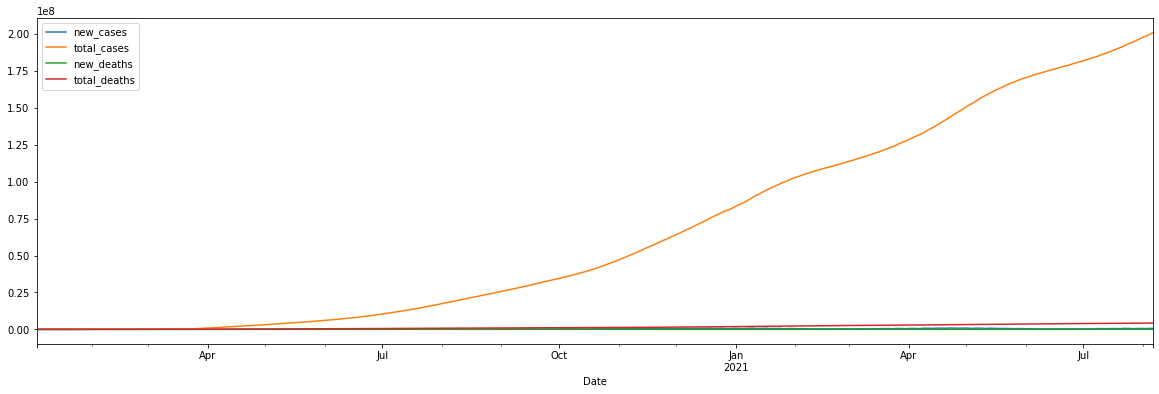

In [23]:
covid_data.plot(figsize=(20,6),x='Date')


In [28]:
df_prophet = covid_data.rename(columns={'Date':'ds','new_cases':'y'})

In [29]:
df_prophet.head()

,ds,y,total_cases,new_deaths,total_deaths
0,2020-01-03,0,0,0,0
1,2020-01-04,1,1,0,0
2,2020-01-05,0,1,0,0
3,2020-01-06,3,4,0,0
4,2020-01-07,0,4,0,0


In [30]:
m = Prophet()

In [31]:
model = m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


model.seasonalities

In [32]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [47]:
future_global = model.make_future_dataframe(periods=90, freq='D')

In [48]:
future_global.shape

(672, 1)

In [49]:
df_prophet.shape

(582, 5)

In [50]:
prediction = model.predict(future_global)

In [51]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-03,-54066.805316,-138939.778687,99512.446969,-54066.805316,-54066.805316,31926.371543,31926.371543,31926.371543,31926.371543,31926.371543,31926.371543,0.0,0.0,0.0,-22140.433773
1,2020-01-04,-52820.276674,-159380.877830,104256.046739,-52820.276674,-52820.276674,21392.125567,21392.125567,21392.125567,21392.125567,21392.125567,21392.125567,0.0,0.0,0.0,-31428.151107
2,2020-01-05,-51573.748032,-159637.999133,93438.022370,-51573.748032,-51573.748032,18660.202539,18660.202539,18660.202539,18660.202539,18660.202539,18660.202539,0.0,0.0,0.0,-32913.545493
3,2020-01-06,-50327.219389,-185882.981025,54344.913308,-50327.219389,-50327.219389,-18190.961450,-18190.961450,-18190.961450,-18190.961450,-18190.961450,-18190.961450,0.0,0.0,0.0,-68518.180840
4,2020-01-07,-49080.690747,-230612.030743,4429.244071,-49080.690747,-49080.690747,-52352.772055,-52352.772055,-52352.772055,-52352.772055,-52352.772055,-52352.772055,0.0,0.0,0.0,-101433.462803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2021-10-31,479098.572969,370160.202872,629816.676070,459805.376918,502249.739245,18660.202539,18660.202539,18660.202539,18660.202539,18660.202539,18660.202539,0.0,0.0,0.0,497758.775507
668,2021-11-01,478698.116890,345058.067858,597755.902079,458962.652162,502126.226883,-18190.961450,-18190.961450,-18190.961450,-18190.961450,-18190.961450,-18190.961450,0.0,0.0,0.0,460507.155440
669,2021-11-02,478297.660812,297811.673224,545082.087829,458308.975000,502040.566097,-52352.772055,-52352.772055,-52352.772055,-52352.772055,-52352.772055,-52352.772055,0.0,0.0,0.0,425944.888757
670,2021-11-03,477897.204734,320309.686753,577114.830107,457324.149623,502064.258789,-28500.378902,-28500.378902,-28500.378902,-28500.378902,-28500.378902,-28500.378902,0.0,0.0,0.0,449396.825832


In [52]:
prediction[['ds','yhat']]

,ds,yhat
0,2020-01-03,-22140.433773
1,2020-01-04,-31428.151107
2,2020-01-05,-32913.545493
3,2020-01-06,-68518.180840
4,2020-01-07,-101433.462803
...,...,...
667,2021-10-31,497758.775507
668,2021-11-01,460507.155440
669,2021-11-02,425944.888757
670,2021-11-03,449396.825832


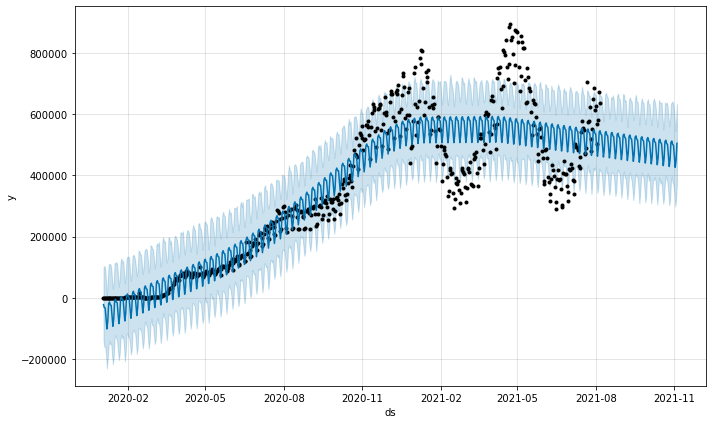

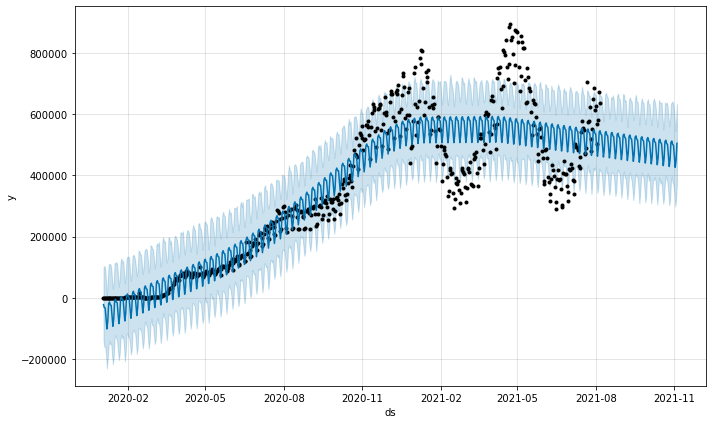

In [53]:
model.plot(prediction)


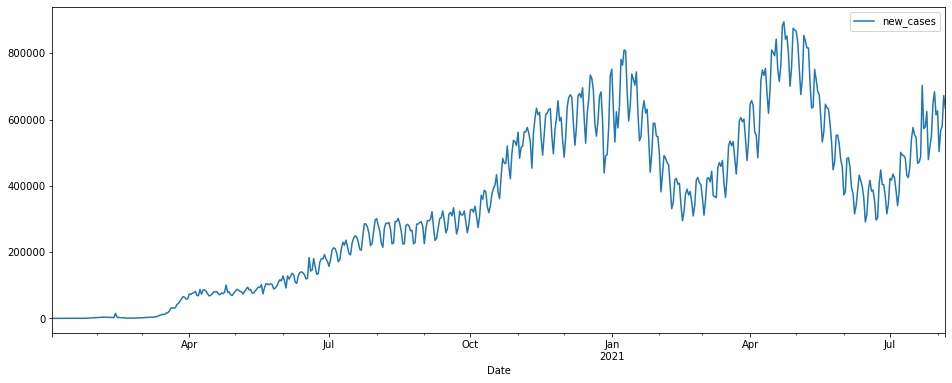

In [71]:
covid_data.plot(figsize = (16,6), x = 'Date', y = 'new_cases')

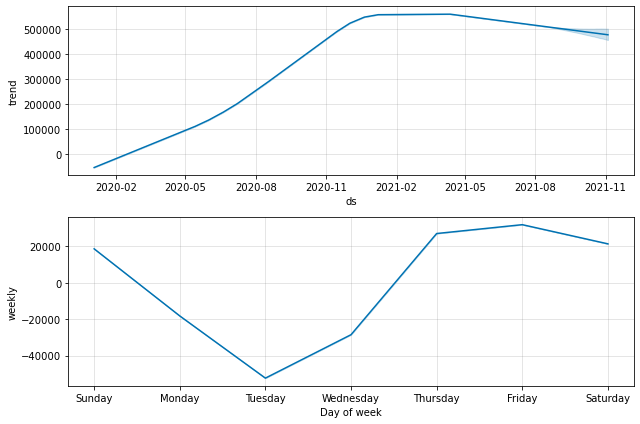

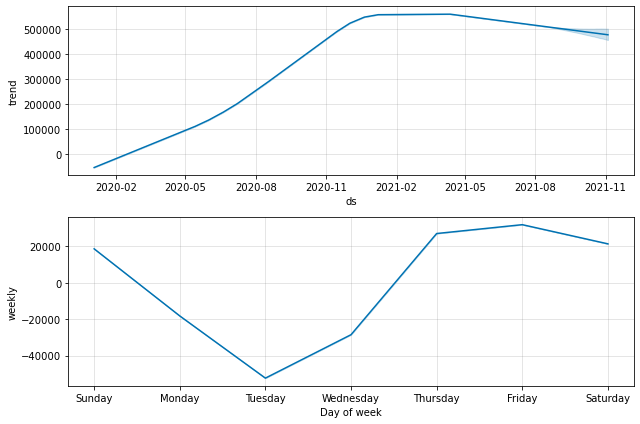

In [58]:
model.plot_components(prediction)

In [59]:
from fbprophet.plot import add_changepoints_to_plot

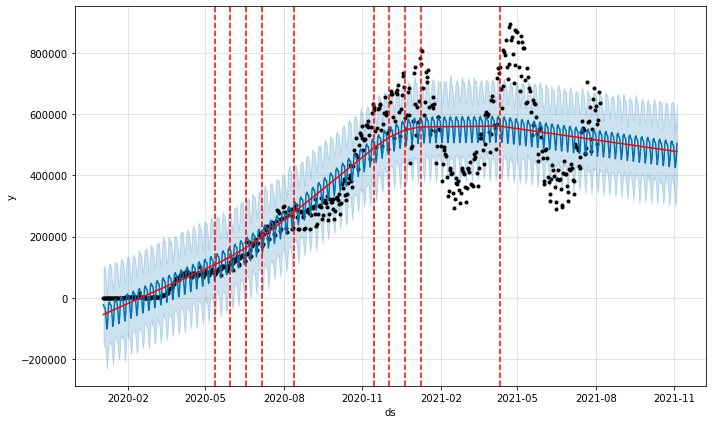

In [60]:
fig = model.plot(prediction)
a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [61]:
from fbprophet.diagnostics import cross_validation

In [63]:
df_cv = cross_validation(model,period='90 days',horizon='45 days',initial='135 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-06-27 00:00:00 and 2021-06-22 00:00:00


In [65]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-28,153931.475934,139242.310574,169947.177945,192452,2020-06-27
1,2020-06-29,152376.001470,137832.424760,167333.443407,179304,2020-06-27
2,2020-06-30,147575.579851,131989.898142,161893.625907,171283,2020-06-27
3,2020-07-01,149505.178395,134269.315214,163931.492559,156888,2020-06-27
4,2020-07-02,158095.435803,142995.316699,173364.542037,178674,2020-06-27


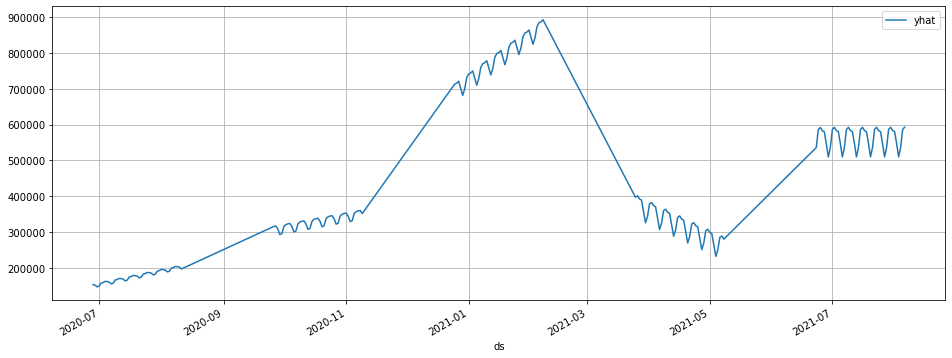

In [70]:
df_cv.plot(x='ds',y='yhat',figsize=(16,6), grid=True)

In [72]:
from fbprophet.diagnostics import performance_metrics

In [73]:
df_pm = performance_metrics(df_cv)
df_pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,2.238616e+10,149620.064967,119680.223279,0.269186,0.327826,0.218182
1,6 days,2.147524e+10,146544.320086,119010.991436,0.271073,0.319174,0.200000
2,7 days,1.946971e+10,139533.908175,111181.174822,0.265120,0.327020,0.245455
3,8 days,1.854741e+10,136188.885188,105034.714567,0.254538,0.232374,0.290909
4,9 days,1.884492e+10,137276.816017,104704.427959,0.247838,0.228221,0.290909


In [74]:
from fbprophet.plot import plot_cross_validation_metric

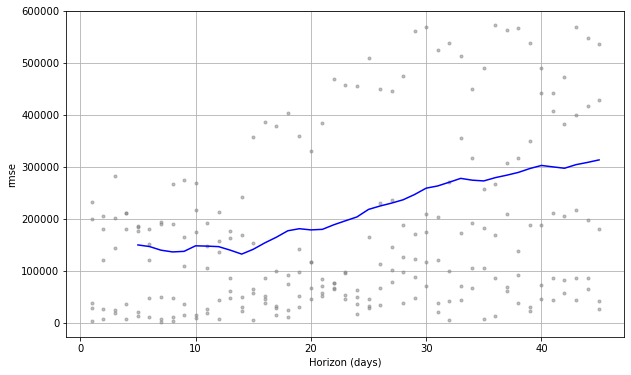

In [78]:
plots = plot_cross_validation_metric(df_cv, metric='rmse')

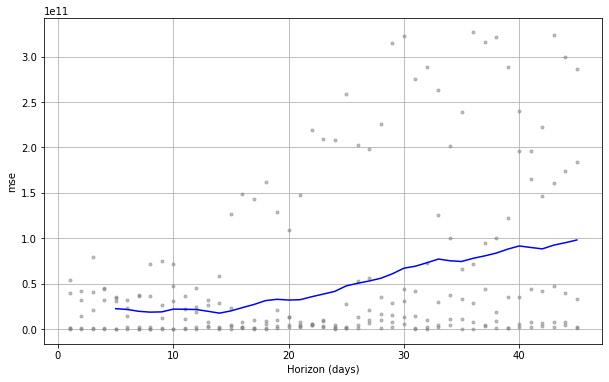

In [79]:
plots = plot_cross_validation_metric(df_cv, metric='mse')